In [28]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def power_law(wl, A, k, C):
    return A*(wl/(1+z))**k+C

def graph_more():
    plt.ylabel(r'f$_\lambda$ ' + ' (erg/s/cm$^2$/Hz)')
    plt.legend(loc=1)

data = pandas.read_csv('../Files/ASASSN-18pg_decam_charlotte/a07.txt', sep='\s+', header=None)
data.columns = ['Instrument', 'Date', 'wl', 'flux']

wl, flux = data['wl'], data['flux']
z = 0

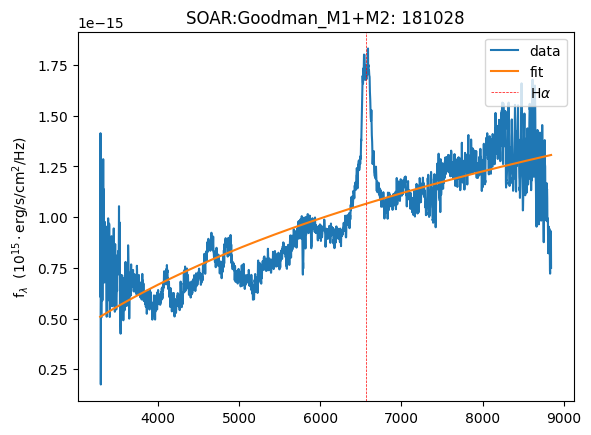

In [11]:
continuum = curve_fit(power_law, wl, flux, p0=[1e-5, -2, 1e-16], maxfev=10000)
pl_params = continuum[0]

plt.plot(wl/(1+z), flux, label='data')
plt.plot(wl/(1+z), power_law(wl, *continuum[0]), label='fit')
plt.ylabel('$f_{\lambda}$')
plt.title(f'{data.iloc[0, 0]}: {data.iloc[0, 1]}')
graph_more()

In [12]:
wl_1 = np.argmin(np.abs(wl/(1+z) - 3950)); wl_2 = np.argmin(np.abs(wl/(1+z) - 4500))
wl_3 = np.argmin(np.abs(wl/(1+z) - 5000)); wl_4 = np.argmin(np.abs(wl/(1+z) - 6250))
wl_5 = np.argmin(np.abs(wl/(1+z) - 6800)); wl_6 = np.argmin(np.abs(wl/(1+z) - 8000))
cut_range = np.concatenate((np.arange(0, wl_1), np.arange(wl_2, wl_3), np.arange(wl_4, wl_5), np.arange(wl_6, wl.index[-1])))

wl_cut = np.delete(wl, cut_range); flux_cut = np.delete(flux, cut_range)

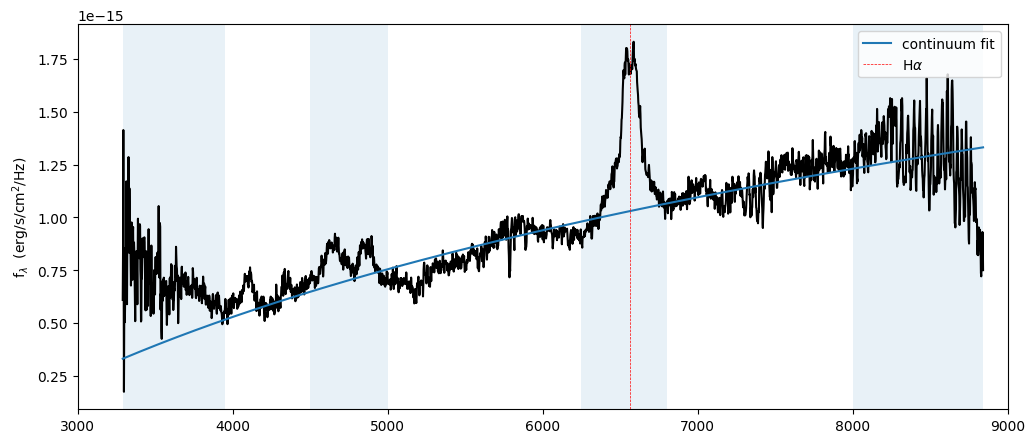

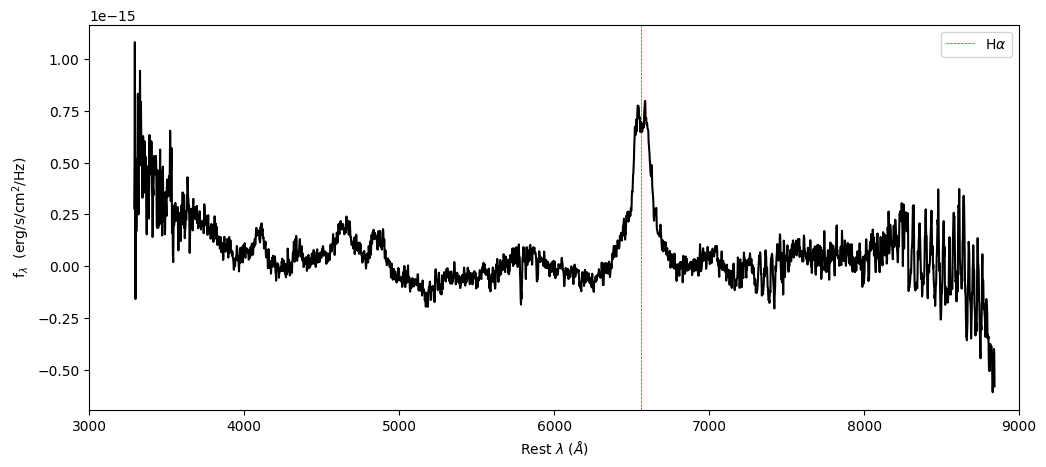

In [29]:
continuum1 = curve_fit(power_law, wl_cut, flux_cut, p0=pl_params, maxfev=int(1e5))

plt.figure(figsize=(12, 5))
plt.plot(wl/(1+z), flux, color='black'); plt.plot(wl/(1+z), power_law(wl, *continuum1[0]), label='continuum fit')
plt.axvline(6563, label=r'H$\alpha$', linewidth=0.5, linestyle='--', color='red')
plt.axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1); plt.axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
plt.axvspan(wl[wl_4]/(1+z), wl[wl_5]/(1+z), alpha=0.1); plt.axvspan(wl[wl_6]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
plt.xlim(3000, 9000)
graph_more()

plt.figure(figsize=(12, 5))
plt.axvline(6563, label=r'H$\alpha$', linewidth=0.5, linestyle='--', color='red')
plt.plot(wl/(1+z), flux - power_law(wl, *continuum1[0]), color='black')
plt.xlabel('Rest $\lambda$ ($\AA$)')
plt.xlim(3000, 9000)
graph_more()

plt.savefig('test.png')

/tmp/ipykernel_883/2325412360.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([int(x*1e3) for x in range(3, 10)])


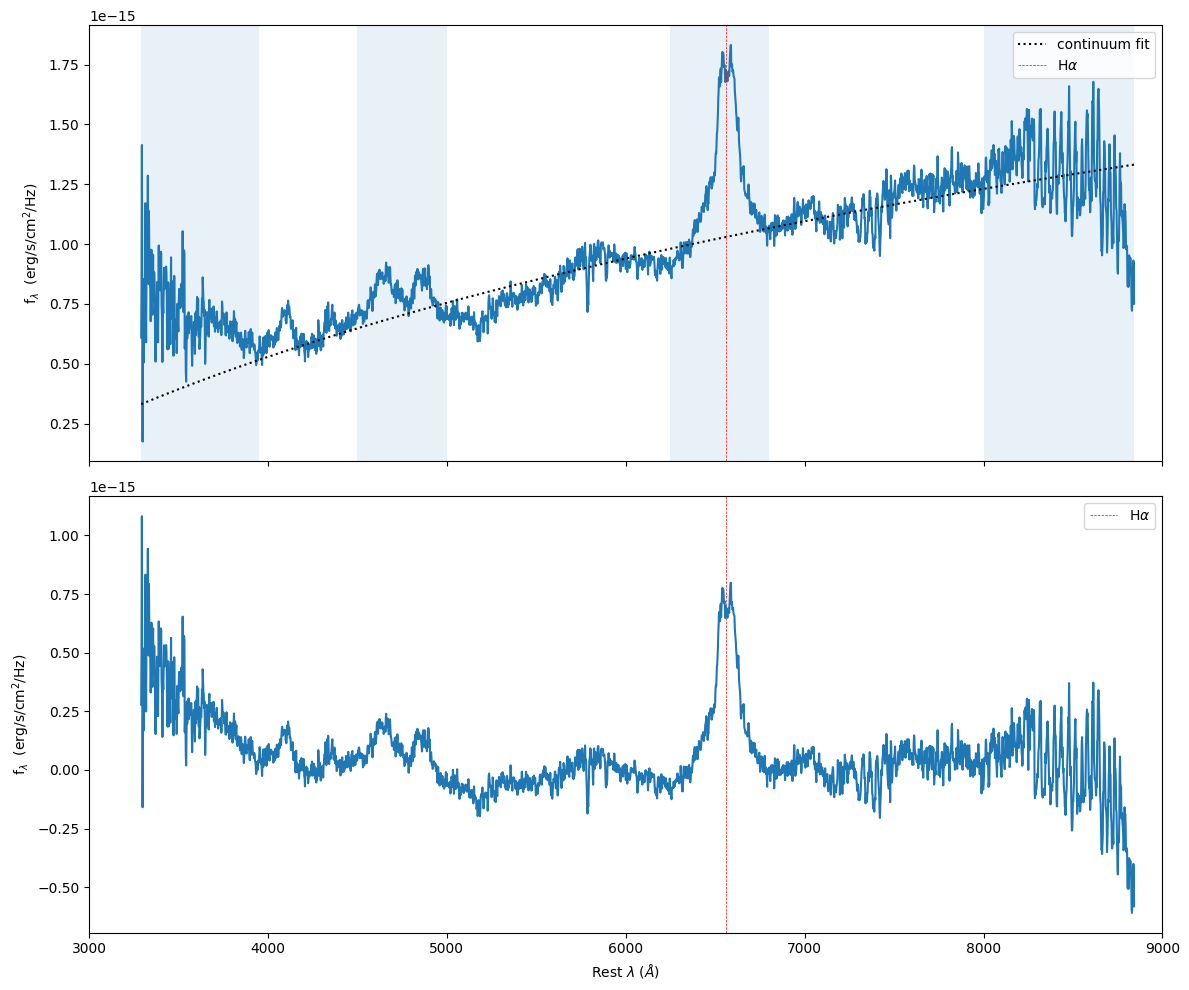

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# First plot (continuum + flux)
axs[0].plot(wl/(1+z), flux)
axs[0].plot(wl/(1+z), power_law(wl, *continuum1[0]), color='black', linestyle='dotted', label='continuum fit')
axs[0].axvline(6563, label=r'H$\alpha$', linewidth=0.5, linestyle='--', color='red')
axs[0].axvspan(wl[0]/(1+z), wl[wl_1]/(1+z), alpha=0.1)
axs[0].axvspan(wl[wl_2]/(1+z), wl[wl_3]/(1+z), alpha=0.1)
axs[0].axvspan(wl[wl_4]/(1+z), wl[wl_5]/(1+z), alpha=0.1)
axs[0].axvspan(wl[wl_6]/(1+z), wl[wl.index[-1]]/(1+z), alpha=0.1)
axs[0].set_xlim(3000, 9000)
axs[0].set_ylabel(r'f$_\lambda$ ' + ' (erg/s/cm$^2$/Hz)')
axs[0].legend(loc=1)
axs[0].set_xticklabels([])
axs[0].set_xlabel('')

# Second plot (flux - continuum)
axs[1].axvline(6563, label=r'H$\alpha$', linewidth=0.5, linestyle='--', color='red')
axs[1].plot(wl/(1+z), flux - power_law(wl, *continuum1[0]))
axs[1].set_xlabel('Rest $\lambda$ ($\AA$)')
axs[1].set_xlim(3000, 9000)
axs[1].set_ylabel(r'f$_\lambda$ ' + ' (erg/s/cm$^2$/Hz)')
axs[0].set_xticklabels([int(x*1e3) for x in range(3, 10)])
axs[1].legend(loc=1)

plt.tight_layout()
plt.savefig("combined_plot.png")  # Optional: to save the figure

In [1]:
continuum[0]

NameError: name 'continuum' is not defined